<div class='bar_title'></div>

*Topics in Data Science 2*

# Deep Learning on Tabular Data

Gunther Gust / Justus Ameling<br>
Chair of Enterprise AI

Winter Semester 23/24

__Credits__

<img src="https://images-na.ssl-images-amazon.com/images/I/516YvsJCS9L._SX379_BO1,204,203,200_.jpg" width="500" align="right"/>

In the next lectures we will dive into Deep Learning using ressources from the book of 
**Jeremy Howard and Sylvian Gugger: "Deep Learning for Coders with Fastai and PyTorch: AI Applications without a PhD." (2020).**

It's freely available as interactive [Jupyter Notebook](https://github.com/fastai/fastbook) 

Materials also taken from:
- https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb
- https://www.fast.ai/2018/04/29/categorical-embeddings/
- https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai 

In [24]:
#Uninstall tensorflow if you want to export embeddings later
#Tensorboard won't work in this session!
#!pip uninstall -y tensorflow 

## Motivation

At the end of 2015, the [Rossmann sales competition](https://www.kaggle.com/c/rossmann-store-sales) ran on Kaggle. Competitors were given a wide range of information about various stores in Germany, and were tasked with trying to predict sales on a number of days. The goal was to help the company to manage stock properly and be able to satisfy demand without holding unnecessary inventory. The official training set provided a lot of information about the stores. It was also permitted for competitors to use additional data, as long as that data was made public and available to all participants.

One of the gold medalists used deep learning, in one of the earliest known examples of a state-of-the-art deep learning tabular model. Their method involved far less feature engineering, based on domain knowledge, than those of the other gold medalists. The paper, ["Entity Embeddings of Categorical Variables"](https://arxiv.org/abs/1604.06737) describes their approach. The authors state:

> Entity embedding not only **reduces memory usage** and **speeds up neural networks compared with one-hot encoding**, but more importantly by **mapping similar values close to each other in the embedding space** it reveals the intrinsic properties of the categorical variables... 

> [It] is especially useful for datasets with lots of **high cardinality features**, where other methods tend to overfit... As entity embedding defines a distance measure for categorical variables it can be used for visualizing categorical data and for data clustering.

### Categorical Embedding Examples

We will have a look at the examples from the paper ["Entity Embeddings of Categorical Variables"](https://arxiv.org/abs/1604.06737) 

**State embeddings and map**

<img alt="State embeddings and map" width="50%" caption="State embeddings and map (courtesy of Cheng Guo and Felix Berkhahn)" id="state_emb" src="https://raw.githubusercontent.com/fastai/fastbook/master/images/att_00015.png">

On the left is a plot of the embedding matrix for the possible values of the `State` category. For a categorical variable we call the possible values of the variable its "levels" (or "categories" or "classes"), so here one level is "Berlin," another is "Hamburg," etc. On the right is a map of Germany. The actual physical locations of the German states were not part of the provided data, yet the model itself learned where they must be, based only on the behavior of store sales!

**Store Distances**

The distance between store embeddings against the actual geographic distance between the stores - they match very closely!

<img alt="Store distances" width="50%" caption="Store distances (courtesy of Cheng Guo and Felix Berkhahn)" id="store_emb" src="https://raw.githubusercontent.com/fastai/fastbook/master/images/att_00016.png">

**Date Embedding**

Days and months that are near each other on the calendar ended up close as embeddings too.

<img alt="Date embeddings" width="50%" caption="Date embeddings" id="date_emb" src="https://raw.githubusercontent.com/fastai/fastbook/master/images/att_00017.png">

How can we train such embeddings?

## Artificial Neural Networks

__What are neural networks?__

- Biological neural networks have interconnected neurons with dendrites that receive inputs, then based on these inputs they produce an output signal through an axon to another neuron
- Artificial Neural Networks (ANN) are a machine learning framework that attempts to mimic the learning pattern of natural biological neural networks
- The creation of ANN begins with the most basic form, a single perceptron

<img src="./images/05/DALL·E 2023-10-07 15.23.07.png" width="30%"/>


### The Perceptron

Developed by Frank Rosenblatt in 1957
- Perceptrons have one or more weighted inputs, a bias, an activation function, and a single output
- A perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output
- The key idea is to “fire” / activate the neuron only if a sufficiently strong input signal is detected

<img src="https://miro.medium.com/max/2870/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="50%"/>


__Different Activation Functions and their Graphs__

<img src="https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png" width="50%"/>

[Image Source](https://medium.com/@shrutijadon10104776/survey-on-activation-functions-for-deep-learning-9689331ba092)

ReLU is the most commonly used Activation Functions, because of its simplicity during backpropagation and its not computationally expensive

### Multi-layer Perceptron aka. Neural Networks

A MLP is composed of multiple layers of perceptrons 

<img src="https://camo.githubusercontent.com/d95fb90b396fc77c614cc6b176dd049066273f96/68747470733a2f2f7777772e64726f70626f782e636f6d2f732f717334746f6a763575356834386c662f6d756c74696c617965725f70657263657074726f6e2e706e673f7261773d31" style="width:80%" />

[Image Source](https://github.com/PetarV-/TikZ/tree/master/Multilayer%20perceptron)

__Layers of a MLP__

- Initial layer = input layer which is fed by the feature inputs
- Last layer = output layer which creates the resulting outputs
- Any layers in between are known as hidden layers because they do not directly “observe” the feature inputs or outputs

__Universal approximation theorem__

From Wikipedia:

_"In the mathematical theory of artificial neural networks, the universal approximation theorem states that a feed-forward network with __a single hidden layer__ containing a finite number of neurons can approximate continuous functions [...] when given appropriate parameters; however, it does not touch upon __the algorithmic learnability of those parameters__."_

### Training Neural Networks

Learning is adjustment of the weights of the connections between perceptrons according to some modification rule. 

- The Backpropagation algorithm searches for weight values that minimize the total error of the network over the set of training examples

It consists of the repeated application of the following two passes.

- __Forward pass__: in this step the network is activated on one example and the error of (each neuron of) the output layer is computed
- __Backward pass__: in this step the network error is used for updating the weights

__Forward and Backward paths__

<img src="https://miro.medium.com/max/3108/1*6q2Rgd8W9DoCN9Wfwc_9gw.png" style="width:60%" />

[Image Source](https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e)

__MLP Example__

We will work with the same dataset as in the last lecture, a sample of the adult dataset which has some census information on individuals. Again, we'll use it to train a model to predict whether salary is greater than $50k or not.

Load packages

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Load data set

In [26]:
file_path = 'https://raw.githubusercontent.com/NikoStein/pds_data/main/data/adult.csv'
adult_data = pd.read_csv(file_path)
adult_data = adult_data.assign(salary=(adult_data['salary']=='>=50k').astype(int))
y = adult_data['salary']
X = adult_data.drop(columns=['salary'])

Split data set

In [27]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state = 0)

Impute missing values (we will omit the categorical features here)

In [28]:
simple_imputer = SimpleImputer()
numCols = X.select_dtypes(['int', 'float']).columns.to_list()
train_X_num = pd.DataFrame(simple_imputer.fit_transform(train_X[numCols]), columns=numCols, index=train_X.index)
val_X_num = pd.DataFrame(simple_imputer.transform(val_X[numCols]), columns=numCols, index=val_X.index)

Standardize numeric features

In [29]:
scaler = StandardScaler()
train_X_num_standardized = pd.DataFrame(scaler.fit_transform(train_X_num), columns=numCols, index=train_X.index)
val_X_num_standardized = pd.DataFrame(scaler.transform(val_X_num), columns=numCols, index=val_X.index)

Train model

In [30]:
model = MLPClassifier()
model.fit(train_X_num_standardized, train_y)

/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

Evaluate predictions

In [31]:
preds = model.predict(val_X_num_standardized)
accuracy_score(val_y, preds)

0.826311263972485

__Advantages of Multi-layer Perceptrons__

- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using `partial_fit`

__The disadvantages of Multi-layer Perceptrons__
- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

[from scikit-learn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

__Is this already deep learning?__

From Wikipedia: 

_"Deep learning [...] uses multiple layers to progressively extract higher level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces."_ 


## Deep Learning on Tabular Data with *fast.ai*

**The Mission of fast.ai: Making neural nets uncool again**

Deep learning is transforming the world. We are making deep learning easier to use and getting more people from all backgrounds involved through our:

- [free courses for coders](http://course.fast.ai/)
- software library: [fastai for PyTorch](http://docs.fast.ai/)
- cutting-edge research
- community

The world needs everyone involved with AI, no matter how unlikely your background.

from [fast.ai](https://www.fast.ai/about/)

First, let's import everything we need for the tabular application.

In [32]:
#!pip install -Uqq fastai  # upgrade fastai on colab
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split

`from <module> import *` means “I want access to all the names in <module> that I’m meant to have access to”

### *fast.ai* Datasets

Tabular data usually comes in the form of a delimited file (such as .csv) containing variables of different kinds: text/category, numbers, and perhaps some missing values. 

*Fast.ai's* [external data functions](https://docs.fast.ai/data.external.html) provides several useful datasets that we might be interested in using in our models.

We will work with the same dataset as in the last lecture, a sample of the __adult dataset__ which has some census information on individuals. Again, we'll use it to train a model to predict whether salary is greater than \$50k or not.

In [33]:
path = untar_data(url=URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('/Users/justusameling/.fastai/data/adult_sample/adult.csv'),Path('/Users/justusameling/.fastai/data/adult_sample/export.pkl'),Path('/Users/justusameling/.fastai/data/adult_sample/models')]

`untar_data()`downloads a dataset from `url` and unpacks it to `path`.

In [34]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


Here all the information that will form our input is in the 14 first columns, and the dependent variable is the last column. We will split our input between two types of variables: categorical and continuous.

### From data to dataloaders

fastai uses [data loaders](https://docs.fast.ai/data.load.html) to get the data ready for training.

A data loader usually combines a dataset and a sampler, and provides an iterable over the given dataset. [fastai](https://docs.fast.ai/data.load.html) includes a replacement for [Pytorch's DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) which is largely API-compatible, and adds a lot of useful functionality and flexibility.

How do we create a data loader?

__Categorical and continuous variables__

- **Categorical variables** (like workclass or education) will be replaced by a category - a unique id that identifies them - before they are passed through an embedding layer.
- **Continuous variables** (like age) will be normalized and then directly fed to the model.

We can specify our categorical and continuous column names, as well as the name of the dependent variable:

In [35]:
y_names = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']

__Tabular data preprocessing__

fast.ai contains classes that define [transformations](https://docs.fast.ai/tabular.core.html#TabularProc) for preprocessing dataframes of tabular data. Preprocessing includes things like

- `Categorify`: replacing non-numerical variables by categories, i.e, their unique category id
- `FillMissing`: filling missing values (default fill strategy: median)
- `Normalize:` normalizing continuous variables

We can define a list of Transforms that will be applied to our variables. Here we transform all categorical variables into categories. We also replace missing values for continuous variables by the median column value and normalize those.

In [36]:
procs = [FillMissing, Categorify, Normalize]

__Training and validation sets__

To split our data into training and validation sets, we use valid indexes

In [37]:
train_idx, valid_idx = train_test_split(df.index, test_size=0.25, random_state = 0)
train_idx[:5] 

Index([26464, 16134, 4747, 8369, 5741], dtype='int64')

__Creating the DataLoader__

Now we're ready to pass this information to a [TabularDataLoader](https://docs.fast.ai/tabular.data.html#TabularDataLoaders) to create the DataLoaders that we'll use for training. We will learn the details of `DataLoaders` class in the next lecture.

In [38]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, 
                                  y_names=y_names,
                                  cat_names = cat_names,
                                  cont_names = cont_names,
                                  valid_idx=valid_idx,
                                  procs = procs,
                                 bs=64)

/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):
/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):
/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):
/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_ca

In [39]:
dls.cat_names

(#7) ['workclass','education','marital-status','occupation','relationship','race','education-num_na']

We can grab a mini-batch of data and take a look. `show_batch` shows a batch of data in a convenient way:

In [40]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Bachelors,Widowed,Prof-specialty,Unmarried,White,False,36.0,194905.000002,13.0,<50k
1,Private,HS-grad,Widowed,Sales,Unmarried,White,False,85.0,115363.997476,9.0,<50k
2,Private,HS-grad,Married-civ-spouse,Protective-serv,Husband,White,False,64.0,110149.998439,9.0,<50k
3,Private,HS-grad,Divorced,Craft-repair,Not-in-family,White,False,35.0,276552.002911,9.0,<50k
4,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,False,39.0,209867.000707,10.0,>=50k
5,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,False,47.0,45564.001879,10.0,>=50k
6,Private,HS-grad,Divorced,Handlers-cleaners,Own-child,White,False,35.0,182073.999832,9.0,<50k
7,Private,11th,Married-spouse-absent,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,False,30.0,356015.004868,7.0,<50k
8,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,False,46.0,267588.003143,13.0,<50k
9,Self-emp-not-inc,9th,Married-civ-spouse,Craft-repair,Husband,White,False,35.0,454914.994521,5.0,<50k


After being processed, the categorical variables are replaced by ids and the continuous variables are normalized. The codes corresponding to categorical variables are all put together, as are all the continuous variables.

But how does the data exactly look like for our model? Let's have a look:


In [41]:
batch = dls.one_batch()
batch

(tensor([[ 1, 16,  5,  1,  4,  5,  1],
         [ 6, 13,  3, 11,  1,  2,  1],
         [ 5,  1,  3,  7,  1,  3,  2],
         [ 7, 10,  5, 13,  4,  2,  1],
         [ 5, 10,  3, 11,  1,  5,  1],
         [ 5,  6,  3,  6,  1,  5,  1],
         [ 7, 16,  5, 11,  3,  2,  1],
         [ 2, 10,  5, 14,  2,  2,  1],
         [ 2,  8,  5,  5,  5,  5,  1],
         [ 5,  2,  5, 13,  4,  5,  1],
         [ 7, 16,  3,  4,  1,  5,  1],
         [ 5, 12,  5, 13,  2,  5,  1],
         [ 1, 12,  5,  1,  5,  3,  1],
         [ 5, 10,  3,  4,  1,  2,  1],
         [ 5, 10,  3,  5,  1,  5,  1],
         [ 5, 16,  3, 13,  1,  5,  1],
         [ 5, 12,  3,  4,  1,  5,  1],
         [ 5,  2,  5, 15,  4,  5,  1],
         [ 5, 12,  1,  8,  2,  5,  1],
         [ 5,  8,  3, 13,  1,  5,  1],
         [ 7,  9,  3,  6,  1,  5,  1],
         [ 5,  7,  5,  7,  3,  5,  1],
         [ 2, 12,  3,  4,  1,  5,  1],
         [ 7, 12,  3,  4,  1,  5,  1],
         [ 5, 12,  5,  5,  4,  5,  1],
         [ 3, 16,  1,  2,

__Note__: As we pick out batches randomly, the output of `show_batch` may not correspond to the output below. 

## Defining a Model

Once we have our data ready in `DataLoaders`, we just need to create a model to then define a Learner and start training. 

This is typically composed of following steps :

1. __Create Learner__: Create an appropriate learner for data. A learner creates a neural network for us.
2. __Find the learning rate__: We need to find a suitable learning rate for our training
3. __Fit the model__

__Create Learner__

The fastai library has a flexible and powerful `TabularModel`. The `tabular_learner` will automatically create a `TabularModel` suitable for your data and infer the right loss function. See the tabular [tutorial](https://docs.fast.ai/tutorial.tabular) for an example of use in context.

In [42]:
learn = tabular_learner(dls, metrics=accuracy)

Let's print a summary of the model.

In [43]:
learn.summary()

TabularModel (Input shape: 64 x 7)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 6              
Embedding                                 60         True      
____________________________________________________________________________
                     64 x 8              
Embedding                                 136        True      
____________________________________________________________________________
                     64 x 5              
Embedding                                 40         True      
____________________________________________________________________________
                     64 x 8              
Embedding                                 128        True      
____________________________________________________________________________
                     64 x 5              
Embedding                                 35         True      
_______________________________________________________________

### Visualizing the model graph with TensorBoard

TensorBoard is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables 

- tracking experiment metrics like loss and accuracy, 
- visualizing the model graph, 
- projecting embeddings to a lower dimensional space, 
- and much more.

Let's load the TensorBoard notebook extension

In [44]:
%load_ext tensorboard

ModuleNotFoundError: No module named 'tensorboard'

The SummaryWriter class is your main entry to log data

In [45]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('tb-tabular')

Write model architecture:

In [46]:
batch = dls.one_batch()#next(iter(dls.train))
writer.add_graph(learn.model.cpu(), batch[:2])

Start TensorBoard

In [47]:
%tensorboard --logdir tb-tabular

UsageError: Line magic function `%tensorboard` not found.


### Train the model

__Find the learning rate__

SuggestedLRs(valley=0.0008317637839354575)

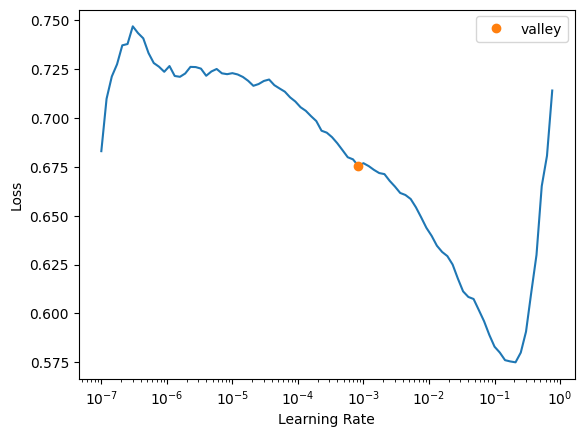

In [49]:
learn.lr_find()

We typically find the point where the slope is steepest. 

We will learn more about the [Learning Rate finder and 1cycle policy](https://fastai1.fast.ai/callbacks.one_cycle.html) in the upcoming lectures.

__Fit the model__ based on selected learning rate

In [50]:
learn.fit_one_cycle(5, lr_max=0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.405767,0.382599,0.819678,00:05
1,0.371927,0.353397,0.832453,00:04
2,0.364962,0.350518,0.834173,00:04
3,0.359498,0.369390,0.825083,00:04
4,0.384667,0.377136,0.825451,00:05


## Model Evaluation

We can then have a look at some predictions:

In [51]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,8.0,13.0,5.0,11.0,2.0,5.0,1.0,-0.853017,0.049323,1.536692,0.0,0.0
1,5.0,13.0,5.0,11.0,5.0,2.0,1.0,-0.120456,-0.277785,1.536692,0.0,0.0
2,5.0,16.0,1.0,5.0,5.0,5.0,1.0,-0.486737,-1.094295,-0.028898,0.0,0.0
3,1.0,1.0,5.0,1.0,3.0,5.0,1.0,-1.585579,-0.898472,-1.594487,0.0,0.0
4,5.0,13.0,3.0,5.0,1.0,5.0,1.0,-0.340224,1.039171,1.536692,1.0,1.0
5,5.0,10.0,3.0,5.0,1.0,5.0,1.0,0.319081,-0.190346,1.145294,1.0,1.0
6,5.0,16.0,3.0,15.0,1.0,5.0,1.0,-0.779761,0.169205,-0.028898,0.0,0.0
7,1.0,12.0,3.0,1.0,1.0,5.0,1.0,1.857461,-0.200192,-0.420295,1.0,0.0
8,5.0,16.0,5.0,13.0,3.0,5.0,1.0,-1.365811,-0.528923,-0.028898,0.0,0.0


__Get predictions__

We can use the `Learner.predict` method to get predictions. In this case, we need to pass the row of a dataframe that has the same names of categorical and continuous variables as our training or validation dataframe.

In [52]:
row, clas, probs = learn.predict(df.iloc[0])

/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):
/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):
/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):
/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_cat

In [53]:
row.show()
df.iloc[0]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,#na#,#na#,#na#,#na#,#na#,#na#,False,49.0,101320.002139,12.0,<50k


age                                49
workclass                     Private
fnlwgt                         101320
education                  Assoc-acdm
education-num                    12.0
marital-status     Married-civ-spouse
occupation                        NaN
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object

In [54]:
clas, probs

(tensor(0), tensor([0.7052, 0.2948]))

**Calculate performance metrics**

In [55]:
learn.validate()

(#2) [0.3771360516548157,0.8254514336585999]

... shows the validation loss and the validation metric (accuracy). 
We can manually compute this as:

In [56]:
probs, val_y = learn.get_preds(ds_idx=1)
preds = np.argmax(probs, axis=1)
accuracy_score(val_y, preds)

0.825451418744626

To get prediction on a new dataframe, you can use the `test_dl` method of the DataLoaders. That dataframe does not need to have the dependent variable in its column.

In [57]:
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):
/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):
/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):
/Users/justusameling/Documents/vsCode Projekte/course/env/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_cat

__Show rows result of predictions on the dataset__

In [58]:
learn.get_preds(dl=dl)

(tensor([[0.7052, 0.2948],
         [0.7061, 0.2939],
         [0.5682, 0.4318],
         ...,
         [0.6837, 0.3163],
         [0.6761, 0.3239],
         [0.6597, 0.3403]]),
 None)

So there is a scope of improving the deep learning model here. However this is not bad at all, without any feature engineering and network tuning.

## Embeddings for Categorical Variables

A key technique to making the most of deep learning for tabular data is to use embeddings for your categorical variables. This approach allows for __relationships between categories__ to be captured.

Examples:
- Saturday and Sunday may have similar behavior, and maybe Friday behaves like an average of a weekend and a weekday. 
-  Similarly, for zip codes, there may be patterns for zip codes that are geographically near each other, and for zip codes that are of similar socio-economic status.

### Applying Embeddings for Categorical Variables

When working with categorical variables, we will represent each category by a vector of floating point numbers (the values of this representation are learned as the network is trained).

For instance, a 4-dimensional version of an embedding for day of week could look like:

__Sunday	 [.8, .2, .1, .1]__<br>
__Monday	[.1, .2, .9, .9]__<br>
__Tuesday	[.2, .1, .9, .8]__

Here, Monday and Tuesday are fairly similar, yet they are both quite different from Sunday. 

Again, this is a toy example. In practice, our neural network would learn the best representations for each category while it is training, and each dimension (or direction, which doesn’t necessarily line up with ordinal dimensions) could have multiple meanings. Rich relationships can be captured in these distributed representations.

### Visualizing Embeddings with Tensorboard

Export embeddings:

In [ ]:
for i, emb in enumerate(learn.model.embeds):
    emb_name = learn.dls.cat_names[i]
    writer.add_embedding(emb.weight.data, metadata=learn.dls.classes[emb_name],
                         global_step=i, tag=emb_name)

Finally, start tensorboard

In [ ]:
%tensorboard --logdir tb-tabular

___Colab Workaround___

In Colab the dynamic tensorborad plugin isn’t supported yet, but you can still access the data and visualize the embeddings somewhere else: 

1. Download the desired embedding file (*tensors.tsv*) and metadata 
2. Upload the files on the official Tensorflow [Embedding Projector](https://projector.tensorflow.org/)

### Conclusion

For analyzing time series and tabular data, deep learning has recently been making great strides. However, deep learning is generally used as part of an **ensemble of multiple types** of model. 

- If you already have a system that is using random forests or gradient boosting machines, then switching to or adding deep learning may not result in any dramatic improvement. 
- Deep learning does greatly increase the variety of columns that you can include
    - columns containing natural language (book titles, reviews, etc.), 
    - high-cardinality categorical columns (i.e., something that contains a large number of discrete choices, such as zip code or product ID). 
- Deep learning models generally take longer to train than random forests or gradient boosting machines, although this is changing thanks to libraries such as [RAPIDS](https://rapids.ai/), which provides GPU acceleration for the whole modeling pipeline.